# Megan Hoeksema
# Data Science Capstone - Winter 2023
# Midterm Project - Breast Cancer Diagnosis

## Packages

In [191]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scikitplot.metrics import plot_calibration_curve
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, zero_one_loss, classification_report, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, plot_roc_curve, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [192]:
cancer_tissues = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBCD/data/data.csv")
cancer_tissues

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [193]:
cancer_tissues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [194]:
# Drop columns not needed in the anaylsis. The ID column is not a relative measure, its a patient identifier. The unnamed: 32
# column is a column full of null values and has to relevance to the analysis.

cancer_tissues.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [195]:
cancer_tissues.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [196]:
# Check the Dtype of each column

cancer_tissues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [197]:
# Check for missing values

cancer_tissues.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [198]:
cancer_tissues['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Data Exploration

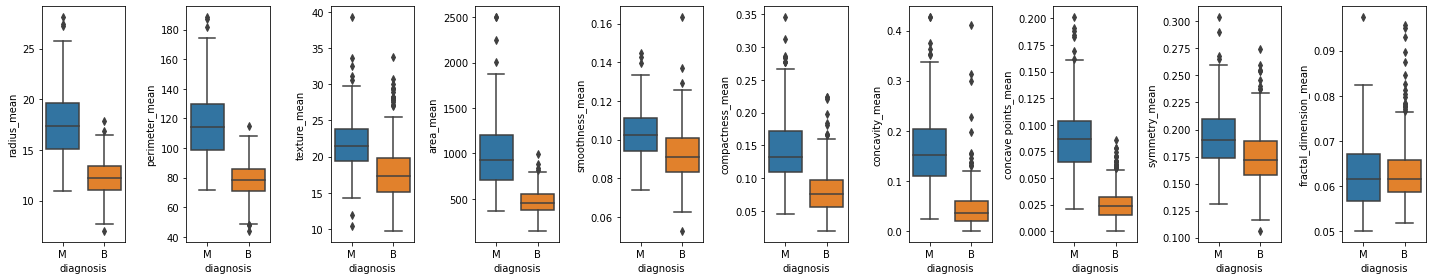

In [199]:
fig, axs = plt.subplots(ncols=10, figsize = (20,4))
sns.boxplot(x='diagnosis', y='radius_mean', data = cancer_tissues, ax=axs[0])
sns.boxplot(x='diagnosis', y='perimeter_mean', data = cancer_tissues, ax=axs[1])
sns.boxplot(x='diagnosis',y='texture_mean', data = cancer_tissues, ax=axs[2])
sns.boxplot(x='diagnosis',y='area_mean', data = cancer_tissues, ax=axs[3])
sns.boxplot(x='diagnosis',y='smoothness_mean', data = cancer_tissues, ax=axs[4])
sns.boxplot(x='diagnosis',y='compactness_mean', data = cancer_tissues, ax=axs[5])
sns.boxplot(x='diagnosis',y='concavity_mean', data = cancer_tissues, ax=axs[6])
sns.boxplot(x='diagnosis',y='concave points_mean', data = cancer_tissues, ax=axs[7])
sns.boxplot(x='diagnosis',y='symmetry_mean', data = cancer_tissues, ax=axs[8])
sns.boxplot(x='diagnosis',y='fractal_dimension_mean', data = cancer_tissues, ax=axs[9])
fig.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

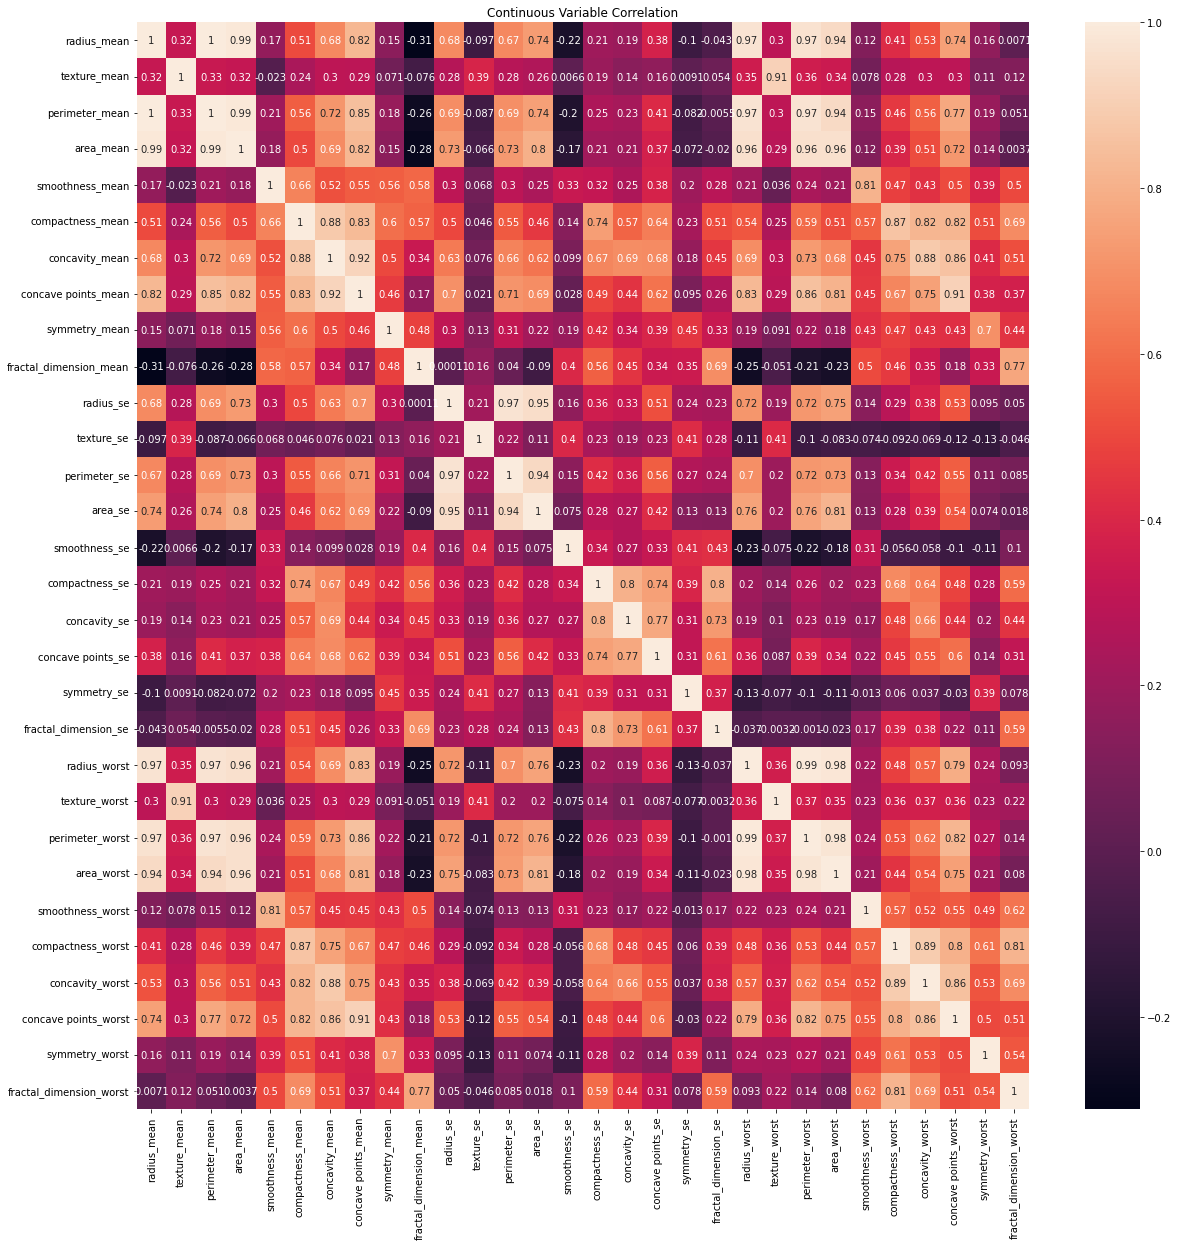

In [201]:
corr_matrix = cancer_tissues.corr()

heatmap = plt.figure(figsize = (20,20))
ax = sns.heatmap(corr_matrix, annot = True).set(title = 'Continuous Variable Correlation')
plt.show

In [202]:
corr = cancer_tissues.corr()
c1 = corr.abs().unstack()
c1[c1 == 1] = 0
c1 = c1.sort_values(ascending = False)
display(c1[c1 > 0.97])

radius_mean      perimeter_mean     0.997855
perimeter_mean   radius_mean        0.997855
radius_worst     perimeter_worst    0.993708
perimeter_worst  radius_worst       0.993708
area_mean        radius_mean        0.987357
radius_mean      area_mean          0.987357
perimeter_mean   area_mean          0.986507
area_mean        perimeter_mean     0.986507
radius_worst     area_worst         0.984015
area_worst       radius_worst       0.984015
                 perimeter_worst    0.977578
perimeter_worst  area_worst         0.977578
radius_se        perimeter_se       0.972794
perimeter_se     radius_se          0.972794
perimeter_worst  perimeter_mean     0.970387
perimeter_mean   perimeter_worst    0.970387
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

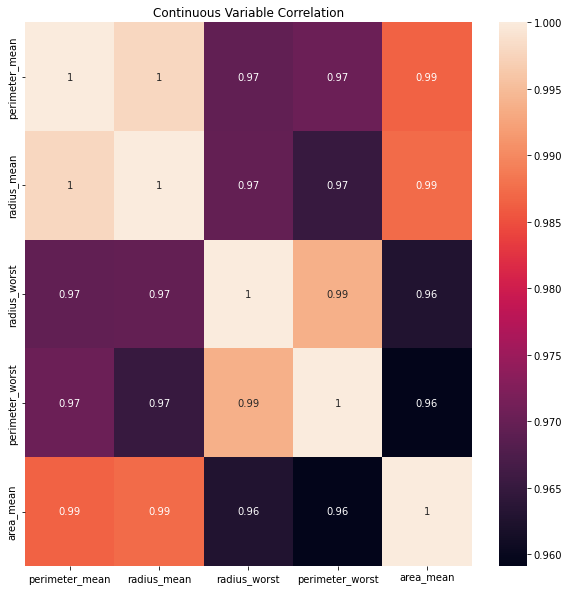

In [203]:
cancer_top = cancer_tissues[['perimeter_mean', 'radius_mean', 'radius_worst', 'perimeter_worst', 'area_mean',]]

corr_matrix_top = cancer_top.corr()

heatmap = plt.figure(figsize = (10,10))
ax = sns.heatmap(corr_matrix_top, annot = True).set(title = 'Continuous Variable Correlation')
plt.show

## Data Pre-Processing

In [204]:
# Obtain Descriptive Statistics

cancer_tissues.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [205]:
cancer_tissues['diagnosis'].replace(['B', 'M'], [0, 1], inplace = True)

In [206]:
# Scaling the data

scaler = MinMaxScaler()
contCols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
            'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 
            'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
            'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
            'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

cancer_tissues.loc[:,contCols] = scaler.fit_transform(cancer_tissues.loc[:,contCols])
cancer_tissues.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [207]:
# Splitting the data into training and test sets

X = cancer_tissues.drop(columns = ['diagnosis'])
y = cancer_tissues['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('Size of X Train: ' + str(len(X_train)))
print('Size of y train: ' + str(len(y_train)))
print('Size of X Test: ' + str(len(X_test)))
print('Size of y test: ' + str(len(y_test)))

Size of X Train: 398
Size of y train: 398
Size of X Test: 171
Size of y test: 171


## Data Analysis (No Hyperparameter Tuning)

In [208]:
# KNN

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
preds_knn_train = clf_knn.predict(X_train)
preds_knn_test = clf_knn.predict(X_test)

print('accuracy_score of training set: ' + str(accuracy_score(y_train, preds_knn_train)))
print('accuracy_score of test set: ' + str(accuracy_score(y_test, preds_knn_test)))

accuracy_score of training set: 0.9773869346733668
accuracy_score of test set: 0.9649122807017544


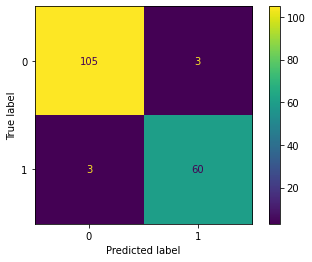

In [209]:
plot_confusion_matrix(clf_knn, X_test, y_test)

In [210]:
print(classification_report(y_test, preds_knn_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [211]:
# SVM

clf_svm = SVC()
clf_svm.fit(X_train, y_train)
preds_svm_train = clf_svm.predict(X_train)
preds_svm_test = clf_svm.predict(X_test)

print('accuracy_score of training set: ' + str(accuracy_score(y_train, preds_svm_train)))
print('accuracy_score of test set: ' + str(accuracy_score(y_test, preds_svm_test)))

accuracy_score of training set: 0.9824120603015075
accuracy_score of test set: 0.9824561403508771


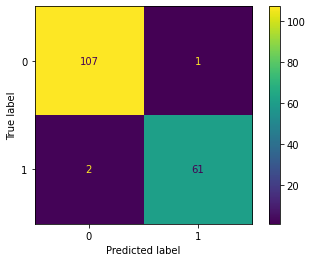

In [212]:
plot_confusion_matrix(clf_svm, X_test, y_test)

In [213]:
print(classification_report(y_test, preds_svm_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [214]:
# Decision Trees

clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)
preds_dt_train = clf_dt.predict(X_train)
preds_dt_test = clf_dt.predict(X_test)

print('accuracy_score of training set: ' + str(accuracy_score(y_train, preds_dt_train)))
print('accuracy_score of test set: ' + str(accuracy_score(y_test, preds_dt_test)))

accuracy_score of training set: 1.0
accuracy_score of test set: 0.9415204678362573


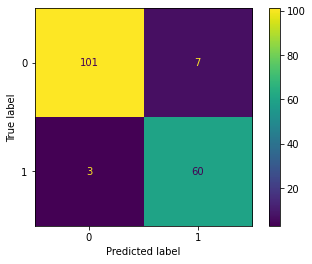

In [215]:
plot_confusion_matrix(clf_dt, X_test, y_test)

In [216]:
print(classification_report(y_test, preds_dt_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       108
           1       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [217]:
# Random Forest

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
preds_rf_train = clf_rf.predict(X_train)
preds_rf_test = clf_rf.predict(X_test)

print('accuracy_score of training set: ' + str(accuracy_score(y_train, preds_rf_train)))
print('accuracy_score of test set: ' + str(accuracy_score(y_test, preds_rf_test)))

accuracy_score of training set: 1.0
accuracy_score of test set: 0.9649122807017544


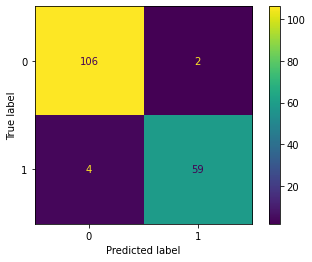

In [218]:
plot_confusion_matrix(clf_rf, X_test, y_test)

In [219]:
print(classification_report(y_test, preds_rf_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [220]:
# Naive Bayes

clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
preds_gnb_train = clf_gnb.predict(X_train)
preds_gnb_test = clf_gnb.predict(X_test)

print('accuracy_score of training set: ' + str(accuracy_score(y_train, preds_gnb_train)))
print('accuracy_score of test set: ' + str(accuracy_score(y_test, preds_gnb_test)))

accuracy_score of training set: 0.9422110552763819
accuracy_score of test set: 0.935672514619883


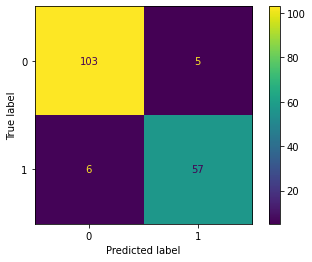

In [221]:
plot_confusion_matrix(clf_gnb, X_test, y_test)

In [222]:
print(classification_report(y_test, preds_gnb_test))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



## Data Analysis (Hyperparameter Tuning)

In [223]:
# KNN
param_grid_knn = {'n_neighbors': list(range(1,101))}

grid_search_knn = GridSearchCV(clf_knn, param_grid_knn, cv = 8)
grid_search_knn.fit(X_test, y_test)
grid_search_knn.best_estimator_

KNeighborsClassifier()

In [224]:
# SVM

param_grid_svm = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                  'kernel': ['rbf', 'sigmoid', 'linear', 'poly']}

grid_search_svm = GridSearchCV(clf_svm, param_grid_svm, cv = 8)
grid_search_svm.fit(X_test, y_test)
grid_search_svm.best_estimator_

SVC(C=1, gamma=1, kernel='linear')

In [225]:
# Decision Tree

param_grid_dt = {'criterion' : ['gini', 'entropy', 'log_loss'], 'max_depth': range(1, 30), 
                 'max_features':[0.2, 0.4, 0.6, 0.8, 1.0]}

grid_search = GridSearchCV(clf_dt, param_grid_dt, cv = 8)
grid_search.fit(X_test, y_test)
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features=0.2)

In [226]:
# Random Forest

param_grid_rf = {'max_features':[0.2, 0.4, 0.6, 0.8], 'n_estimators':[3, 10, 30, 100], 'max_depth': range(1, 30)}

grid_search_rf = GridSearchCV(clf_rf, param_grid_rf, cv = 8)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_estimator_

RandomForestClassifier(max_depth=24, max_features=0.2)

In [227]:
# Gaussian Naive Bayes

param_grid_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search_gnb = GridSearchCV(clf_gnb, param_grid_gnb, cv = 8)
grid_search_gnb.fit(X_test, y_test)
grid_search_gnb.best_params_

{'var_smoothing': 0.2848035868435802}

In [245]:
# KNN
final_knn = grid_search_knn.best_estimator_
final_knn.fit(X_test, y_test.values.ravel())
preds_knn_final = final_knn.predict(X_test)

# SVM
final_svc = grid_search_svm.best_estimator_
final_svc.fit(X_test, y_test.values.ravel())
preds_svc_final = final_svc.predict(X_test)

# Decision Tree
final_dt = grid_search.best_estimator_
final_dt.fit(X_test, y_test.values.ravel())
preds_dt_final = final_dt.predict(X_test)

#Random Forest
final_rf = grid_search_rf.best_estimator_
final_rf.fit(X_test, y_test.values.ravel())
preds_rf_final = final_rf.predict(X_test)

# GaussianNB
final_gnb = grid_search_gnb.best_estimator_
final_gnb.fit(X_test, y_test.values.ravel())
preds_gnb_final = final_gnb.predict(X_test)


print('accuracy_score of KNN Model: ' + str(round(accuracy_score(y_test, preds_knn_final),3)))
print('accuracy_score of SVC Model: ' + str(round(accuracy_score(y_test, preds_svc_final),3)))
print('accuracy_score of Decision Tree Model: ' + str(round(accuracy_score(y_test, preds_dt_final),3)))
print('accuracy_score of Random Forest Model: ' + str(round(accuracy_score(y_test, preds_rf_final),3)))
print('accuracy_score of Naive Bayes Model: ' + str(round(accuracy_score(y_test, preds_gnb_final),3)))

accuracy_score of KNN Model: 0.977
accuracy_score of SVC Model: 0.982
accuracy_score of Decision Tree Model: 1.0
accuracy_score of Random Forest Model: 1.0
accuracy_score of Naive Bayes Model: 0.953


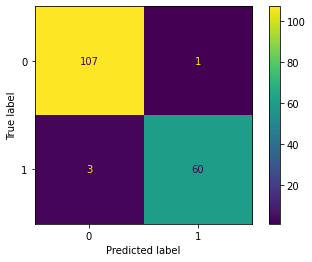

In [230]:
# Confusion Matrix for KNN

plot_confusion_matrix(final_knn, X_test, y_test)

In [231]:
# Classification Report for KNN

print(classification_report(y_test, preds_knn_final))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



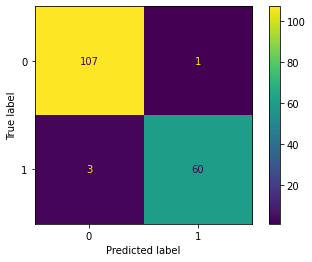

In [232]:
# Confusion Matrix for SVC

plot_confusion_matrix(final_svc, X_test, y_test)

In [233]:
# Classification Report for SVM

print(classification_report(y_test, preds_svc_final))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



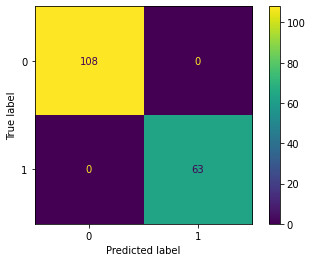

In [234]:
# Confusion Matrix for Decision Trees

plot_confusion_matrix(final_dt, X_test, y_test)

In [235]:
# Classification Report for Decision Trees

print(classification_report(y_test, preds_dt_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        63

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



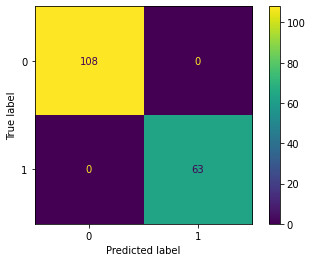

In [236]:
# Confusion Matrix for Random Forest

plot_confusion_matrix(final_rf, X_test, y_test)

In [237]:
# Classification Report for Random Forest

print(classification_report(y_test, preds_rf_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        63

    accuracy                           1.00       171
   macro avg       1.00      1.00      1.00       171
weighted avg       1.00      1.00      1.00       171



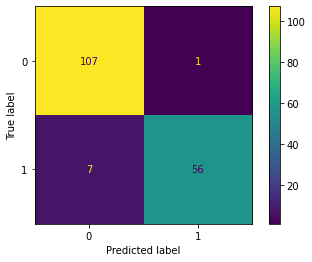

In [238]:
plot_confusion_matrix(final_gnb, X_test, y_test)

In [239]:
# Classification Report for Gaussian Naive Bayes

print(classification_report(y_test, preds_gnb_final))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       108
           1       0.98      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



## Data Visualization

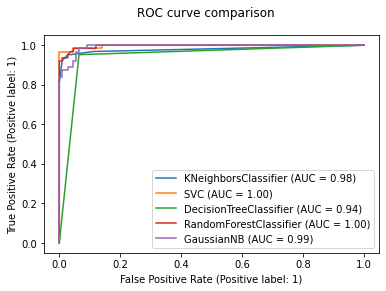

In [241]:
knn_disp = plot_roc_curve(clf_knn, X_test, y_test)
svc_disp = plot_roc_curve(clf_svm, X_test, y_test, ax=knn_disp.ax_)
dr_disp = plot_roc_curve(clf_dt, X_test, y_test, ax=knn_disp.ax_)
rf_disp = plot_roc_curve(clf_rf, X_test, y_test, ax=knn_disp.ax_)
gnb_disp = plot_roc_curve(clf_gnb, X_test, y_test, ax=knn_disp.ax_)

knn_disp.figure_.suptitle("ROC curve comparison")

plt.show()

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

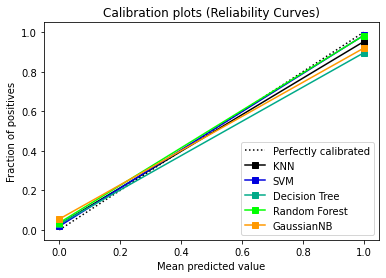

In [134]:
probas_list = [preds_knn_test, preds_svm_test, preds_dt_test, preds_rf_test, preds_gnb_test]
clf_names = ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'GaussianNB']
plot_calibration_curve(y_test, probas_list,clf_names, n_bins=15)

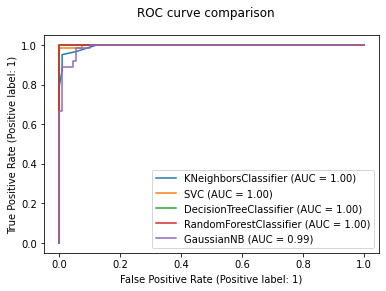

In [246]:
knn_disp = plot_roc_curve(final_knn, X_test, y_test)
svc_disp = plot_roc_curve(final_svc, X_test, y_test, ax=knn_disp.ax_)
dr_disp = plot_roc_curve(final_dt, X_test, y_test, ax=knn_disp.ax_)
rf_disp = plot_roc_curve(final_rf, X_test, y_test, ax=knn_disp.ax_)
gnb_disp = plot_roc_curve(final_gnb, X_test, y_test, ax=knn_disp.ax_)

knn_disp.figure_.suptitle("ROC curve comparison")

plt.show()

<AxesSubplot:title={'center':'Calibration plots (Reliability Curves)'}, xlabel='Mean predicted value', ylabel='Fraction of positives'>

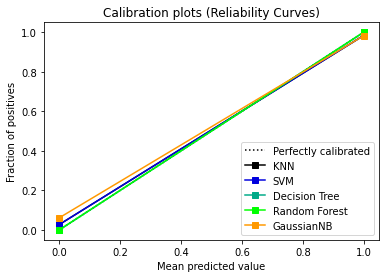

In [141]:
probas_list = [preds_knn_final, preds_svc_final, preds_dt_final, preds_rf_final, preds_gnb_final]
clf_names = ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'GaussianNB']
plot_calibration_curve(y_test, probas_list,clf_names, n_bins=15)